In [24]:
from __future__ import division
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize'] = (8.0, 8.0)
import mayavi.mlab as mlab
import matplotlib.pyplot as plt
import numpy as np

import sparse_transforms as spt

# Initialization

## For visualization 

In [2]:
def viz3D(grids, V, X_label='X', Y_label='Y', Z_label='Z', title='3D Visualization', interpolation='linear'):

    mlab.figure()

    X, Y, Z = grids.expanded
    src = mlab.pipeline.scalar_field(X, Y, Z, V)
    src.spacing = [1, 1, 1]
    src.update_image_data = True    
    ipw_x = mlab.pipeline.image_plane_widget(src, plane_orientation='x_axes')
    ipw_x.ipw.reslice_interpolate = interpolation
    ipw_x.ipw.texture_interpolate = False
    ipw_y = mlab.pipeline.image_plane_widget(src, plane_orientation='y_axes')
    ipw_y.ipw.reslice_interpolate = interpolation
    ipw_y.ipw.texture_interpolate = False
    ipw_z = mlab.pipeline.image_plane_widget(src, plane_orientation='z_axes')
    ipw_z.ipw.reslice_interpolate = interpolation
    ipw_z.ipw.texture_interpolate = False
    mlab.colorbar()
    mlab.outline()
    mlab.xlabel(X_label)
    mlab.ylabel(Y_label)
    mlab.zlabel(Z_label)

    limits = []
    for grid in (X, Y, Z):
        limits += [grid.min()]
        limits += [grid.max()]
    mlab.axes(ranges=limits)
    mlab.title(title)
    
    mlab.show()

## Create the base grids object

In [25]:
Y = np.linspace(-5, 5, 50)
X = np.linspace(-5, 5, 50)
Z = np.linspace(-5, 5, 50)
        
grids = spt.Grids(Y, X, Z)

## Create a base volume 

In [65]:
Y, X, Z = grids.expanded
V = np.ones_like(Y)
V[Y>3] = 0
V[X>3] = 0
V[Z>3] = 0
V[Y<-3] = 0
V[X<-3] = 0
V[Z<-3] = 0

In [57]:
viz3D(grids, V)

# Transforms 

## Rotation 

In [74]:
Hrot = spt.rotationTransform(grids, rotation=(0, np.pi/4, np.pi/4))

In [75]:
Vrot = Hrot * V

In [68]:
viz3D(Hrot.out_grids, Vrot)

## Integral 

In [76]:
Hint = spt.integralTransform(grids, axis=0)
Hrot_int = spt.integralTransform(Hrot.out_grids, axis=1)

In [77]:
Iint = Hint * V
Irot_int = Hrot_int * Vrot

<matplotlib.colorbar.Colorbar instance at 0x000000002FCB0148>

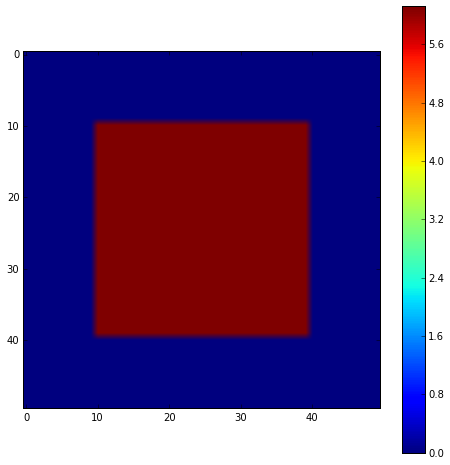

In [78]:
plt.imshow(Iint)
plt.colorbar()

<matplotlib.colorbar.Colorbar instance at 0x000000003019A0C8>

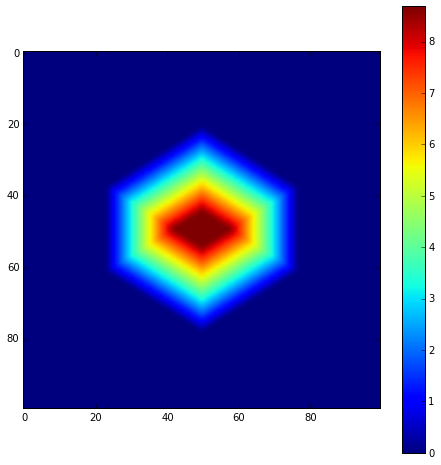

In [79]:
plt.imshow(Irot_int)
plt.colorbar()

## Cumsum Transform

In [80]:
Hcs = spt.cumsumTransform(grids, axis=0)
Hrot_cs = spt.cumsumTransform(Hrot.out_grids, axis=0)

In [84]:
Vcs = Hcs * V
Vrot_cs = Hrot_cs * Vrot

In [82]:
viz3D(grids, Vcs)

In [85]:
viz3D(Hrot.out_grids, Vrot_cs)